In [1]:
import matplotlib.pyplot as plt
import math
from astroquery.jplhorizons import Horizons
import csv

In [2]:
#this now writes to file!
#this will all be a seperate script that creates the initial data file 


kg_to_solar = 5.02785e-31

epoch = 2459293.33546 #corresponds to march 19 2021 -> as this was the day I started lol

number_planets = 8

#this is mass in kg and radius in km
#could use astropy constants for this???

#may want a second file that contains all of this -> maybe this is the file that the bash script edits?

body_properties = {'Sun': (1.988e30, 6.955e5),
        'Mercury': (3.301e23, 2440.),
        'Venus': (4.867e+24, 6052.),
        'Earth': (5.972e24, 6371.),
        'Mars': (6.417e23, 3390.),
        'Jupiter': (1.899e27, 69911.),
        'Saturn': (5.685e26, 58232.),
        'Uranus': (8.682e25, 25362.),
        'Neptune': (1.024e26, 24622.)
       }
bodies = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']

#probably want this to be its own class
#a list like this is shit house! -> maybe thats the point though!
Solar_system = []

output_file = 'planet_coordinates.txt'

kg_to_SM = 5.02785*10**(-31)
km_to_AU = 6.68459*10**(-9)


#maybe have something that checks if this file exists! -> condition in bash script??
file = open(output_file, 'w')

# +1 for sun
for i in range(number_planets + 1):
    #returns obj with position and velocities of planets in Au and Au/day
    #probably continue to ignore z??
    query = Horizons(id=i, location='@sun', epochs=2459293.33546, id_type='id').vectors()
    
    # x, y, vx, vy, radius, mass, -> maybe some kind of colour?
    file.write('{} {} {} {} {} {} \n'.format(query['x'].data[0], query['y'].data[0], query['vx'].data[0], 
               query['vy'].data[0], body_properties[bodies[i]][1]*km_to_AU, body_properties[bodies[i]][0]*kg_to_SM))
     
    #file.write(({query['x'].data[0]}, {query['y'].data[0]}, {query['vx'].data[0]}, 
               #{query['vy'].data[0]}, {body_properties[bodies[i]][1]}, {body_properties[bodies[i]][0]}))
    
    #this wont be the long term behaviour, instead write to file!
    #x, y, vx, vy, radius, mass
    #note we are ignoring and z dependence!
    #mass and radius are probably in the wrong units!
    #Solar_system.append(celestial_body(query['x'].data[0], query['y'].data[0], query['vx'].data[0], 
                                       #query['vy'].data[0], body_properties[bodies[i]][1], body_properties[bodies[i]][0]*kg_to_solar))
file.close()
sun = Horizons(id=0, epochs=2459293.33546, id_type='id').vectors()
#mercury = Horizons(id=1, epochs=2459293.33546, id_type='id').vectors()
#venus = Horizons(id=2, location="@sun", epochs=2459293.33546, id_type='id').vectors()
earth = Horizons(id=3, epochs=2459293.33546, id_type='id').vectors()
#mars = Horizons(id=4, location="@sun", epochs=2459293.33546, id_type='id').vectors()
#jupiter = Horizons(id=5, location="@sun", epochs=2459293.33546, id_type='id').vectors()
#saturn = Horizons(id=6, location="@sun", epochs=2459293.33546, id_type='id').vectors()
#uranus = Horizons(id=7, location="@sun", epochs=2459293.33546, id_type='id').vectors()
#neptune = Horizons(id=8, location="@sun", epochs=2459293.33546, id_type='id').vectors()

In [7]:

display(sun)
display(earth)

Sun = celestial_body(sun['x'], sun['y'], sun['vx'], sun['vy'], Sun_radius, Sun_mass)

Earth = celestial_body(earth['x'], earth['y'], earth['vx'], earth['vy'], Earth_radius, Earth_mass)

targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
---,d,---,AU,AU,AU,AU / d,AU / d,AU / d,d,AU,AU / d
str27,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64
Solar System Barycenter (0),2459293.33546,A.D. 2021-Mar-19 20:03:03.7440,0.007162429080586439,-0.005526421288907193,-0.0001220439697071769,6.268286595064352e-06,6.498578436127947e-06,-2.029835056132149e-07,5.225379817352702e-05,0.009047464690589228,9.955329142170867e-07


targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
---,d,---,AU,AU,AU,AU / d,AU / d,AU / d,d,AU,AU / d
str25,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64
Earth-Moon Barycenter (3),2459293.33546,A.D. 2021-Mar-19 20:03:03.7440,-0.99562915985182,0.0147841217535721,2.223704388705565e-06,-0.0005359001368498665,-0.01726718945544204,8.174076917988693e-07,0.005750908378260759,0.9957389186971706,0.0002794684112044442


NameError: name 'Sun_radius' is not defined

In [2]:
#Apophis is the asteroid on near earth orbit!

#maybe change to planet?
class celestial_body:
    
    
    def __init__(self, x, y, vx, vy, radius, mass):
        
        #are any of these comments needed?
        
        #initial x and y coordinates of the celestial body
        self.x = x
        self.y = y
        
        self.x_positions = [x]
        self.y_positions = [y]
        
        #initial x and y velocity coordinates of the celestial body
        self.vx = vx
        self.vy = vy
        
        #initial x and y acceleration coordinates of the celestial body
        #maybe dont need an accelration here, just work with force and divide by mass within class!
        self.ax = 0 #not sure if an initial acceleration is needed tbh!
        self.ay = 0
    
        #initialise the colour and size of the planet
        self.radius = radius
        self.mass = mass
        #self.colour = colour #used for plotting!
        
    #not sure this is how dt should be passed around, maybe should be h instead?
    def update_velocity(self, dt):
        self.vx += self.ax*dt
        self.vy += self.ay*dt
        #self.reset_acceleration()
        
    #really don't think dt should be passed in, surely it is a constant??
    def update_position(self, dt):
        self.x += self.vx*dt
        self.y += self.vy*dt
        self.x_positions.append(self.x)
        self.y_positions.append(self.y)
        
    #reset the acceleration between iterations
    def reset_acceleration(self):
        self.ax = 0
        self.ay = 0

In [4]:
### create the planet objects, reading from the file!

output_file = 'planet_coordinates.txt'
#format of file may need more consideration, not sure if txt file is the best bet!

#file names need to be chosen more carefully!
coord_file = open(output_file, 'r')

solar_system = []

for line in coord_file:
    
    coord_list = [float(i) for i in line.split()]
    #may not be the correct type, but not sure that will matter!
    solar_system.append(celestial_body(*coord_list))
    
    #print(line.split())

    
#print(solar_system[0].x)
#random list found, might be better to use scipy??
#https://scipython.com/book/chapter-4-the-core-python-language-ii/examples/a-simple-database-of-astronomical-objects/


In [5]:
#Sun = celestial_body(0, 0, 0, 0, Sun_radius, Sun_mass)

#Earth = celestial_body(Earth_x, 0, 0, Earth_vy, Earth_radius, Earth_mass)
#display(sun['x'].data[0])
#display(earth['x'])
#display(earth)
#data[0] required because they return some really stupid type lol
#Sun = celestial_body(sun['x'].data[0], sun['y'].data[0], sun['vx'].data[0], sun['vy'].data[0], Sun_radius, Sun_mass)

#Earth = celestial_body(earth['x'].data[0], earth['y'].data[0], earth['vx'].data[0], earth['vy'].data[0], Earth_radius, Earth_mass)

G = 6.67*10**(-11) #m^3/kg/s^2 #probably need this in km^3???

#print(Sun_mass)
#conversion (6.68459e-12)^3/(5.02785e-31*3.17098e-8*3.17098e-8)*6.67*10^(-11)

#G = 39.4 #units of AU^3/solar_mass/years^2
#should write this down in latex so it is confident!

#should have this defined somewhere!
G = 2.96 *10**(-4) #units of Au^3/solar_mass/days^2
#G=10

dt = 0.01
#at dt = 1 -> earth spirals inward -> demonstrates a minimum step_size for accuracy!

for i in range(50000):
    
    #may need to check these loops
    #these get the acceleration of each body from all the other ones!
    for j in range(len(solar_system)):
        body1 = solar_system[j]
        
        #print(bodies[j])
        
        for k in range(j+1, len(solar_system)):
            body2 = solar_system[k]
            #print(bodies[j], bodies[k])
    
            y_diff = body2.y - body1.y

            x_diff = body2.x - body1.x
            #print(y_diff, x_diff)
            #print('Sun pos: ', Sun.x, Sun.y)
            #print('Eath pos ', Earth.x, Earth.y)

            #need to apply some sort of test to check if planets have collided!
            #can test this by introducing a massive asteroid!


            #thingo has (y,x) but surely it should be x, y?
            #try to undertsand what is actually going on here 
            angle = math.atan2(y_diff, x_diff)
            #print('Angle:', angle)
            #should make sure this is correct 
            force = G*body1.mass*body2.mass/(x_diff**2 + y_diff**2)
            
            a1 = force/body1.mass
            a2 = force/body2.mass
            #print(Sun.mass)
            #print(G, Sun.mass, Earth.mass, x_diff, y_diff)
            #print('Force: ',force)
            
            #not entirely clear why we need the pi here lol
            body1.ax += a1*math.cos(angle)
            body1.ay += a1*math.sin(angle)
            
            
            body2.ax += a2*math.cos(angle + math.pi)
            body2.ay += a2*math.sin(angle + math.pi)
            
            
            #Sun.ax = force/Sun.mass*math.cos(angle+math.pi) #may need a plus pi? #not sure why this one needs to be negative??
            #Sun.ay = force/Sun.mass*math.sin(angle+math.pi) #may need a plus pi?
    
            #print('Sun a: ', Sun.ax, Sun.ay)
            #print(Sun.ay)

            #Earth.ax = force/Earth.mass*math.cos(angle) 
            #Earth.ay = force/Earth.mass*math.sin(angle)

            #print('Earth acceleration:', Earth.ax, Earth.ay)

    for body in solar_system:
        #print(body.x, body.ax)
        #print(body.y, body.ay)
        body.update_position(dt)
        body.update_velocity(dt)
        body.reset_acceleration()
    
    #Sun.update_position(dt)
    #Sun.update_velocity(dt)

    #Earth.update_position(dt)
    #Earth.update_velocity(dt)

    #Earth.reset_acceleration()
    #Sun.reset_acceleration()
            #print('donzo')



    
#should write position data to a file, then read data with python and plot with seaborn
#that way all plots will look the same, maybe have a look at c plotting though!
#print(Sun.x_positions)
#print(Earth.x_positions)
#plt.plot(Sun.x_positions, Sun.y_positions)

#this probably shouldn't be a txt file



In [6]:


#easier to write a file for each body?
#maybe write one file that splits after each body?


coord_file_base = 'data_body_'

num_bodies = 8

#not sure if this is the most efficient way of doing this, but should be alright!
#maybe should time this to make sure it isn't a big time sink!
for i in range(num_bodies):
    output_file_str = coord_file_base + str(i+1) + '.txt'
    #print(output_file)
    
    with open(output_file_str, 'w') as f:
        
        #good because it writes all the coordinates at once
        csv.writer(f, delimiter=' ').writerows(zip(solar_system[i].x_positions, solar_system[i].y_positions))
    
    #output_file = open(output_file_str, 'w')
    #for x, y in zip(solar_system[i].x_positions, solar_system[i].y_positions):
        #print(x, y, file=output_file)
        
    #output_file.close()
'''
sim_data = 'simulation_data.txt'

sim_data_file = open('simulation_data.txt', 'w')

for i in solar_system:
    #print(i.x_positions)
    #need to think more about how this is stored!
    coord_pairs = list(zip(i.x_positions, i.y_positions))
    #print(len(*coord_pairs))
    #using print to write to the file seems to be the best way to do this!
    #writing during the iterations might be better so that each thing doesn't have to store its entire history!
    print(coord_pairs, file=sim_data_file)
    #sim_data_file.write(str(*coord_pairs))

#print(*coord_pairs)
#sim_data_file.write('{} \n'.format(coord_pairs))
sim_data_file.close()

for i in solar_system:
    plt.plot(i.x_positions, i.y_positions)
plt.show()
'''

"\nsim_data = 'simulation_data.txt'\n\nsim_data_file = open('simulation_data.txt', 'w')\n\nfor i in solar_system:\n    #print(i.x_positions)\n    #need to think more about how this is stored!\n    coord_pairs = list(zip(i.x_positions, i.y_positions))\n    #print(len(*coord_pairs))\n    #using print to write to the file seems to be the best way to do this!\n    #writing during the iterations might be better so that each thing doesn't have to store its entire history!\n    print(coord_pairs, file=sim_data_file)\n    #sim_data_file.write(str(*coord_pairs))\n\n#print(*coord_pairs)\n#sim_data_file.write('{} \n'.format(coord_pairs))\nsim_data_file.close()\n\nfor i in solar_system:\n    plt.plot(i.x_positions, i.y_positions)\nplt.show()\n"

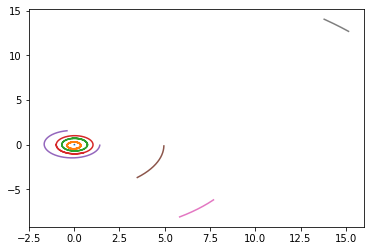

"\nfor line in data:\n    #horrific way of doing this, file format needs to be adjusted\n    coords = list(zip(*eval(line)))\n    x = coords[0]\n    y = coords[1]\n    plt.plot(x, y)\n    #print(coords)\n    \nplt.show()\n    #print(line.split(') ('))\n    \n"

In [7]:
#read the position data from the file and print it out! -> eventually use seaborn for a bit of proffesionalism

import numpy as np
#may need access to the radius and colour of each body
#assumes the data is in (x,y) coordinate pairs, may need to be adjusted!
#data = open(sim_data, 'r')


for i in range(num_bodies):
    input_file_str = coord_file_base + str(i+1) + '.txt'
    #x = []
    #y = []
    #input_file = open(input_file_str, 'r')
    x, y = np.loadtxt(input_file_str, delimiter=' ', unpack=True)
    #with open(input_file_str, 'r') as filein:
        #reader = csv.reader(filein, delimiter=' ')
        #print(*reader)
        #print(list(zip(*reader)))
        #x, y = zip(*reader)
        #print(x)
        #print(y)
    plt.plot(x, y)
    #input_file = open(input_file_str, 'r')

plt.show()

'''
for line in data:
    #horrific way of doing this, file format needs to be adjusted
    coords = list(zip(*eval(line)))
    x = coords[0]
    y = coords[1]
    plt.plot(x, y)
    #print(coords)
    
plt.show()
    #print(line.split(') ('))
    
'''